Import Tools

In [1]:
#Import tools 

import scipy
from scipy.io import loadmat
from scipy.stats import skew
from scipy.stats import kurtosis

import numpy as np
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD #stochastic gradient descent 
import seaborn as sns 
from matplotlib import ticker

Import data and plot windward tap 95 cp v time 

In [2]:
#Import data 
#Read the matlab data

#number of wind angles 
n_wind = 19

#Wind directions 
min_wind_dxn = 0
max_wind_dxn = 90
wind_dxns = np.linspace(min_wind_dxn, max_wind_dxn, n_wind)
data_mat = []

for i in range(n_wind): 
    file_name  = "../../../data/T215_4_{:03d}_1.mat".format(int(wind_dxns[i]))
    print("Now reading: ", file_name)
    data_mat.append(loadmat(file_name))

#Figure out the dimention from the first wind direction
mat_size = np.shape(data_mat[0]["Wind_pressure_coefficients"])

#Number of timesteps 
n_time  = mat_size[0]

#number of taps 
n_taps  = mat_size[1]

#3d matix (tap number, time, wind angle)
cp_mat = np.zeros((n_wind, n_time, n_taps ))

#take just the wind pressure coefficient matrix
for i in range(n_wind): 
    cp_mat[i, :, :] = data_mat[i]["Wind_pressure_coefficients"]

# cp_mat[:,:,0] = cp00
# cp_mat[:,:,1] = cp05
# cp_mat[:,:,2] = cp10
# cp_mat[:,:,3] = cp15
# cp_mat[:,:,4] = cp20
# cp_mat[:,:,5] = cp25
# cp_mat[:,:,6] = cp30
# cp_mat[:,:,7] = cp35
# cp_mat[:,:,8] = cp40
# cp_mat[:,:,9] = cp45
# cp_mat[:,:,10] = cp50
# cp_mat[:,:,11] = cp55
# cp_mat[:,:,12] = cp60
# cp_mat[:,:,13] = cp65
# cp_mat[:,:,14] = cp70
# cp_mat[:,:,15] = cp75
# cp_mat[:,:,16] = cp80
# cp_mat[:,:,17] = cp85
# cp_mat[:,:,18] = cp90

print(n_time)
print(n_taps)
print(n_wind)

#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n_time
# x = the time at each point 
x = np.linspace(0, T, n_time, False) 


Now reading:  ../../../data/T215_4_000_1.mat
Now reading:  ../../../data/T215_4_005_1.mat
Now reading:  ../../../data/T215_4_010_1.mat
Now reading:  ../../../data/T215_4_015_1.mat
Now reading:  ../../../data/T215_4_020_1.mat
Now reading:  ../../../data/T215_4_025_1.mat
Now reading:  ../../../data/T215_4_030_1.mat
Now reading:  ../../../data/T215_4_035_1.mat
Now reading:  ../../../data/T215_4_040_1.mat
Now reading:  ../../../data/T215_4_045_1.mat
Now reading:  ../../../data/T215_4_050_1.mat
Now reading:  ../../../data/T215_4_055_1.mat
Now reading:  ../../../data/T215_4_060_1.mat
Now reading:  ../../../data/T215_4_065_1.mat
Now reading:  ../../../data/T215_4_070_1.mat
Now reading:  ../../../data/T215_4_075_1.mat
Now reading:  ../../../data/T215_4_080_1.mat
Now reading:  ../../../data/T215_4_085_1.mat
Now reading:  ../../../data/T215_4_090_1.mat
32768
510
19


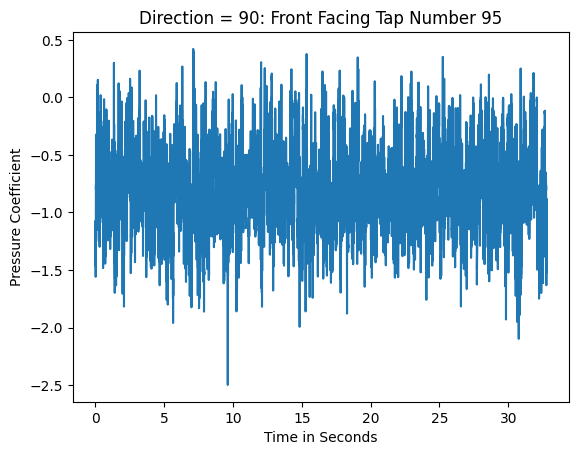

In [3]:
#Plot Sample 

dxn_no = 18
tap_no = 95

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()




Plot Right Sideward Tap 103

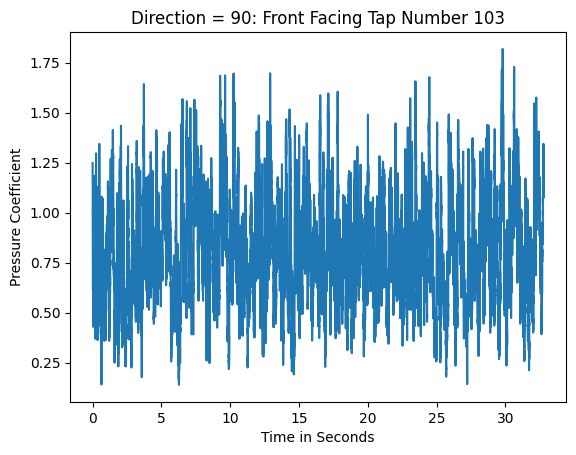

In [4]:
#Plot Sample 

dxn_no = 18
tap_no = 103

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()


Plot Leeward Tap 111

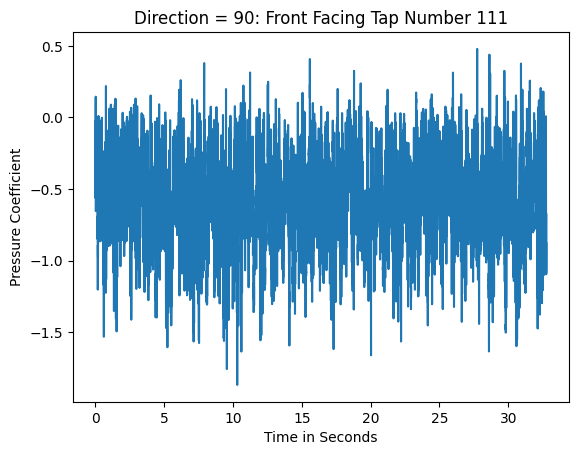

In [5]:
#Plot Sample 

dxn_no = 18
tap_no = 111

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()


Plot Left Sideward Tap 118

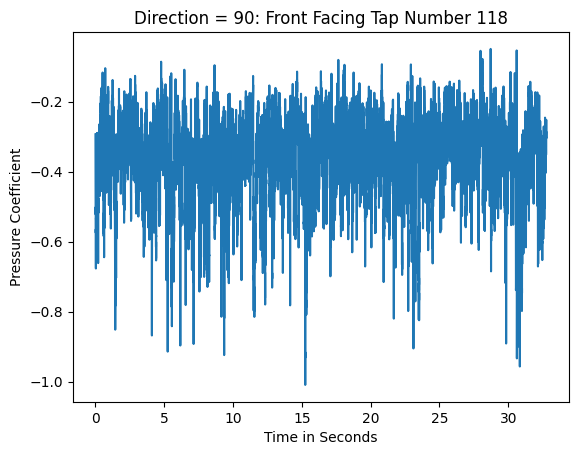

In [6]:
#Do the same but for a left Side tap 
#Plot Sample 

dxn_no = 18
tap_no = 118

y = cp_mat[dxn_no, :,tap_no]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Direction = {}: Front Facing Tap Number {}'.format(int(wind_dxns[dxn_no]), tap_no))             
plt.show()


Plot Short duration Split 

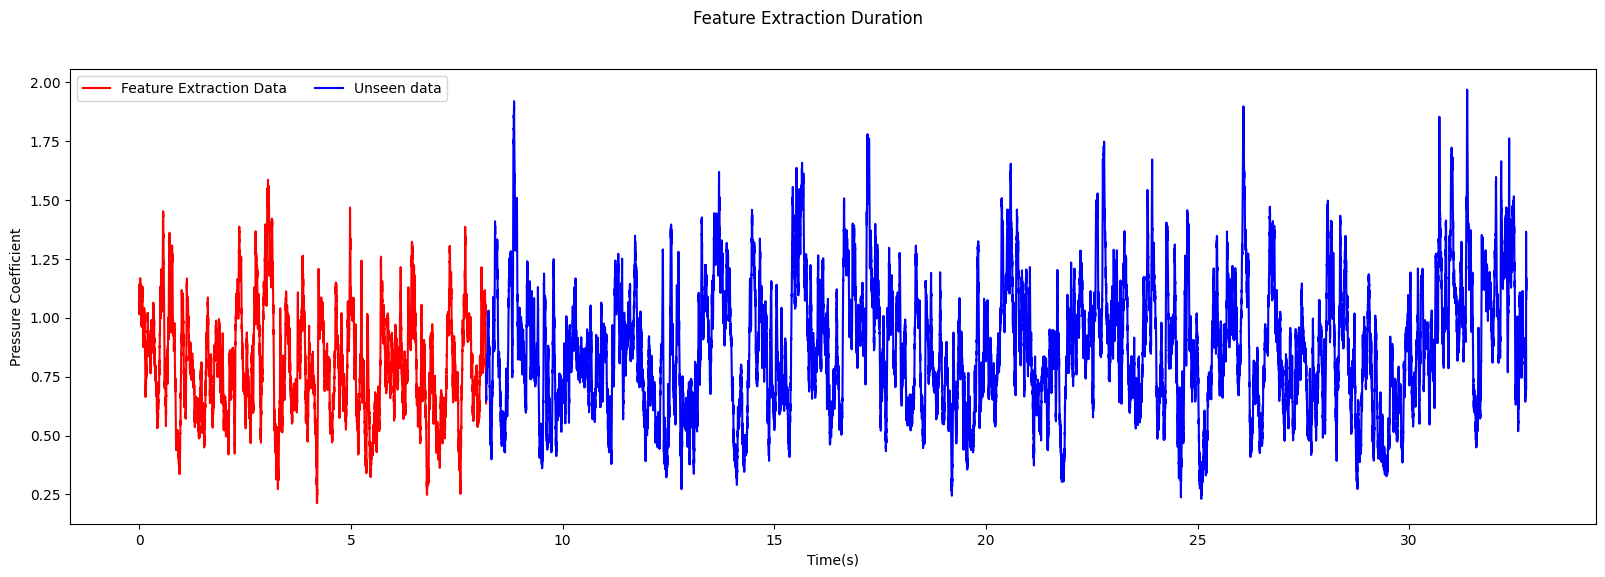

In [7]:
#n= number of timesteps 

#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n_time
# x = the time at each point 
x = np.linspace(0, T, n_time, False)
#cp_mat = np.zeros((n_wind, n_time, n_taps ))
tap_no = 95
cp_mat_y = y = cp_mat[0, :, 95 ]
y = cp_mat[0, :, 95 ]

fig, (ax) = plt.subplots()
fig.suptitle('Feature Extraction Duration')
data_percent = 0.25
duration = int(data_percent*n_time)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Pressure Coefficient')
ax.plot(x[:duration], y[:duration], 'r-', linewidth=1.5)
ax.plot(x[duration:], y[duration:], 'b-', linewidth=1.5)

#ax.set_xlim(left=0, right=5)
#ax.set_ylim(bottom=0, top=5)

ax.legend(['Feature Extraction Data', 'Unseen data'], ncol=2, frameon=True) 
fig.set_size_inches(50/2.54, 15/2.54) 
#plt.tight_layout()
#fig.savefig('Plots/MLP_devided_data_sample.pdf')
#fig.savefig('Plots/MLP_devided_data_sample.png')
#plt.show()

Define Min and Max Peak Function 

In [8]:
def lieblin_blue(x):
    """
    Performs Lieblin Blue fitted peak values for a time series in 'x'.
    If the time series cannot be divided into 10 equal segments the remaining
    part is discarded.
    """
    #Coefficient used for the Lieblein Blue fit
    a = [ 0.222867,  0.162308,  0.133845, 0.112868, 0.095636, 0.080618, 0.066988, 0.054193, 0.041748, 0.028929]
    b = [-0.347830, -0.091158, -0.019210, 0.022179, 0.048671, 0.066064, 0.077021, 0.082771, 0.083552, 0.077940]
    n_seg = 10 #Number of segments
    #Min and max of each segment
    x_max = np.zeros(n_seg)
    x_min = np.zeros(n_seg)
    #Number of time steps per each segment
    n_per_seg = int(np.rint(len(x)/n_seg))
    #Calculate the min and max of each segment.
    for i in range(n_seg):
        x_max[i] = np.amax(x[i*n_per_seg:(i+1)*n_per_seg])
        x_min[i] = np.amin(x[i*n_per_seg:(i+1)*n_per_seg])
    x_max = np.sort(x_max)      #sort in assending order
    x_min = -np.sort(-x_min)    #sort in decending order
    #Calculate the mode and dispertions
    u_max = np.dot(a,x_max)
    u_min = np.dot(a,x_min)
    d_max = np.dot(b,x_max)
    d_min = np.dot(b,x_min)
    #Calculate the peak based on Gambel distribution.
    x_peak_gb_max = u_max + d_max*np.log(n_seg)
    x_peak_gb_min = u_min + d_min*np.log(n_seg)
    #Calculate the stable peak using Lieblein Blue method.
    x_peak_lb_max = x_peak_gb_max + 0.5772*d_max
    x_peak_lb_min = x_peak_gb_min + 0.5772*d_min
    return x_peak_lb_max, x_peak_lb_min

## Create Features in numpy

In [9]:
#n_features  = 8
n_features = 7

#cp_mat = np.zeros((n_wind, n_time, n_taps ))\
features = np.zeros((n_wind, n_taps, n_features))

#cp_mat = np.zeros((n_wind, n_time, n_taps ))
#feature(wind_dxn,tap_num, feature)

cp_mat_short = cp_mat[:,:duration,:]
print(cp_mat_short.shape)

# for k in range(n_wind):
features[:,:,0] = np.mean(cp_mat_short, axis=1) #how to I make it so it only takes wind direction k, is it about axis 1 or 2? 
features[:,:,1] = np.std(cp_mat_short, axis=1)
features[:,:,2] = scipy.stats.skew(cp_mat_short, axis=1)
features[:,:,3] = scipy.stats.kurtosis(cp_mat_short, axis=1)
features[:,:,4] = np.max(cp_mat_short, axis=1)
features[:,:,5] = np.min(cp_mat_short, axis=1)
features[:,:,6] = features[:,:,4] - features[:,:,5] #range


#for k in range(n_taps):
   #for j in range(n_wind):
      #features[j,k,7] = wind_dxns[j]
#np.shape(features)

#Does wind anle need to be an output too? 
min_peak = np.zeros((n_wind, n_taps))
max_peak = np.zeros((n_wind, n_taps)) 
peak = np.zeros((n_wind,n_taps,2))
# peak[:,0] = np.max(cp, axis=0)
for j in range(n_wind):
   for k in range(n_taps):
      max_peak[j, k], min_peak[j, k] = lieblin_blue(cp_mat[j, :, k]) 
peak[:,:,0] = max_peak
peak[:,:,1] = min_peak
print(max_peak.shape)
print(features.shape)
print(peak.shape)

(19, 8192, 510)
(19, 510)
(19, 510, 7)
(19, 510, 2)


Change the array into two dimentions

In [10]:
n_features  = 7

features_2d = np.zeros((n_wind*n_taps, n_features))
peak_2d = np.zeros((n_wind*n_taps, 2))
#cp_mat = np.zeros((n_wind, n_time, n_taps ))
#feature(wind_dxn,tap_num, feature)

for i in range(n_wind):
    features_2d[n_taps*i:n_taps*(i+1), :] = features[i, :, :]

for i in range(n_wind):
    peak_2d[n_taps*i:n_taps*(i+1), :] = peak[i,:,:]



print(features_2d.shape)
print(peak_2d.shape)
max_peak = np.zeros(n_wind*n_taps)
min_peak = np.zeros(n_wind*n_taps)
max_peak = peak_2d[:,0] 
min_peak = peak_2d[:,1] 
print(max_peak[:50])
print(min_peak[:50])
print(features_2d[:50,0])



(9690, 7)
(9690, 2)
[ 1.83850672  1.91399045  1.83767841  1.6853695   1.74761979  1.76773561
  1.83577422  1.77728236  1.56448442  1.52316226 -0.22756326 -0.18324116
 -0.03009417  0.13986651  0.41431644  0.05126188  0.01574555 -0.08183181
 -0.08890939 -0.03812873 -0.09873728 -0.01758153 -0.00385005 -0.02285683
 -0.03412873  0.34201154  0.20267017  0.0317173  -0.22158725 -0.20214458
  1.67522355  2.05068025  2.01918104  2.10106979  2.14177395  2.12366615
  2.0941741   1.95434748  1.79780477  1.44650222 -0.22155249 -0.2108762
 -0.24066659  0.04383182  0.1373404  -0.06611668 -0.09705236 -0.16373943
 -0.1053484  -0.1155086 ]
[-0.49853685 -0.41841375 -0.37648526 -0.36340289 -0.38466545 -0.3481083
 -0.3325852  -0.27376479 -0.35497162 -0.56306513 -2.86363457 -2.67249656
 -2.73367011 -2.65440415 -2.49858612 -2.08890454 -1.86545775 -1.77291521
 -1.7709558  -1.77872626 -1.66879041 -1.70441277 -1.84179341 -1.8368892
 -2.02938602 -2.4871933  -2.66751083 -2.73481764 -3.08805653 -3.22294427
 -0.3152

Shuffle the sensors into a random order 

In [11]:
import random

# Create a list of numbers from 0 to 509*19
numbers = list(range(n_taps*n_wind))

# Shuffle the numbers randomly
random.shuffle(numbers)

# Print the shuffled numbers
print(numbers)


[8142, 5285, 7726, 4538, 2954, 5385, 1676, 1026, 3869, 7838, 8684, 7123, 744, 6514, 8116, 8590, 4215, 8921, 3591, 46, 375, 9563, 6802, 8137, 6791, 5072, 3295, 1572, 704, 7243, 8529, 8306, 9267, 1079, 3632, 1057, 4042, 349, 1816, 332, 7029, 1945, 3297, 8330, 201, 7397, 4114, 6211, 6517, 9425, 2758, 2698, 2931, 4202, 2362, 3387, 929, 6960, 8209, 8069, 7907, 7291, 4348, 8000, 3786, 4219, 7941, 3084, 4849, 3201, 1148, 9656, 8589, 6820, 4541, 3903, 5906, 8352, 2537, 6986, 3073, 9637, 1742, 9148, 5615, 4156, 6664, 5024, 6718, 4050, 6937, 2602, 2529, 2796, 1570, 8677, 8740, 7965, 3249, 3765, 3886, 6375, 4087, 5265, 8545, 4513, 4681, 8892, 669, 2052, 9151, 6473, 439, 4434, 9282, 7532, 574, 9400, 6333, 6248, 7903, 3412, 4871, 8797, 8810, 7927, 4658, 882, 2840, 4558, 4747, 3542, 1751, 4938, 5410, 7259, 7370, 6959, 8555, 1274, 2960, 9373, 3157, 6352, 5589, 7082, 2228, 5413, 9655, 2066, 5091, 682, 5370, 6848, 8283, 5580, 8978, 9523, 8021, 5171, 6868, 1345, 739, 9255, 7070, 9556, 4510, 5203, 3787, 

Split the sensors into training, validating, and testing and add features and peaks into respective arrays 

In [12]:

#number of taps in training, testing, and validating 
n_training = int(0.8*n_taps*n_wind)
n_validation = int(0.1*n_taps*n_wind)
n_testing = int(0.1*n_taps*n_wind)

train_features = np.zeros(( n_training, n_features))
train_peak = np.zeros((n_training, 2))


validate_features = np.zeros((n_validation, n_features))
validate_peak = np.zeros((n_validation,2))

test_features = np.zeros((n_testing, n_features))
test_peak = np.zeros((n_testing,2))

for i in range(0, n_training):
    idx = numbers[i]
    train_features[i,:] = features_2d[idx, :]
    train_peak[i,0] = max_peak[idx]
    train_peak[i,1] = min_peak[idx]

for i in range(0, n_validation):
    idx = numbers[i+n_testing]
    validate_features[i,:] = features_2d[idx, :]
    validate_peak[i,0] = max_peak[idx]
    validate_peak[i, 1] = min_peak[idx]


for i in range(0, n_testing):
    idx = numbers[i+n_testing+n_validation]
    test_features[i,:] = features_2d[idx, :] 
    test_peak[i, 0] = max_peak[idx]
    test_peak[i, 1] = min_peak[idx]

Convert inputs and outputs to torch 

In [13]:
train_features_tor = torch.from_numpy(train_features.astype(np.float32))
train_peak_tor = torch.from_numpy(train_peak.astype(np.float32))


validate_features_tor = torch.from_numpy(validate_features.astype(np.float32))
validate_peak_tor = torch.from_numpy(validate_peak.astype(np.float32))


test_features_tor = torch.from_numpy(test_features.astype(np.float32))
test_peak_tor = torch.from_numpy(test_peak.astype(np.float32))


Create MLP model using Pytorch 

In [14]:


class MyMLP(nn.Module):
    "Defines a connected network"
    #N_input = 8 
    #N_output = 2 because we just have min and max peak 
    #N_hidden is number neurons in hidden layers 
    #N_layers is total num of layers
    #nn.sequential repeat process without having to write out ever layer 
    #x is the output 
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.ReLU
        self.MLP1 = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.MLP2 = nn.Sequential(*[
                        nn.Sequential(*[
                        nn.Linear(N_HIDDEN, N_HIDDEN),
                        activation()]) for _ in range(N_LAYERS-1)])
        self.MLP3 = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.MLP1(x)
        x = self.MLP2(x)
        x = self.MLP3(x)
        return x


Train the model 

In [15]:
def train_model(model, criterion, optimizer, x_train, x_valid, y_train, y_valid, epochs=500):
    
    train_loss = np.zeros(epochs)
    valid_loss = np.zeros(epochs)
    
    for epoch in range(epochs):
        
        # put default model grads to zero
        optimizer.zero_grad()
        
        # predict the output
        pred = model(train_features_tor)
        
        # calculate the loss 
        error = criterion(pred,train_peak_tor) #???????????????????????
        
        # backpropagate the error
        error.backward()
        
        # update the model parameters
        optimizer.step()
        
        # save the losses 
        train_loss[epoch] = error.item()
        
        # Validation loss 
        valid_pred = model(validate_features_tor)
        valid_error = criterion(validate_peak_tor,valid_pred) #????????????????????????????
        valid_loss[epoch] = valid_error.item() 
        
        if (epoch+1) % 5 ==0:
            print('Epoch :{}    Train Loss :{}    Validation Loss :{}'.format((epoch+1)/epochs, error.item(), valid_error.item()))
            
    return train_loss, valid_loss


    

#Training

In [16]:
#def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
#def __init__(self, in_dim, hid_dim, out_dim, num_layers):
#in_size = window_size
#out_size = 1
#hid_size = 5
#num_layers = 2
num_epochs = 400
#N_INPUT = 8
N_INPUT = 7
N_OUTPUT = 2
N_HIDDEN = 10
N_LAYERS = 10

mlp_model = MyMLP(N_INPUT,N_OUTPUT,N_HIDDEN, N_LAYERS)

optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.01)
loss_fun = nn.MSELoss()

#Run the model
train_loss, valid_loss = train_model(mlp_model,
               loss_fun,
               optimizer,
               train_features_tor,
               validate_features_tor,
               train_peak_tor,
               validate_peak_tor,
               num_epochs)

c:\Users\nicol\anaconda3\envs\torchEnv\lib\site-packages\torch\autograd\__init__.py:200: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch :0.0125    Train Loss :1.6305378675460815    Validation Loss :1.5399755239486694
Epoch :0.025    Train Loss :1.2489445209503174    Validation Loss :1.1226246356964111
Epoch :0.0375    Train Loss :0.6435399651527405    Validation Loss :0.7257859110832214
Epoch :0.05    Train Loss :0.5653144121170044    Validation Loss :0.5864033699035645
Epoch :0.0625    Train Loss :0.5935310125350952    Validation Loss :0.5975697040557861
Epoch :0.075    Train Loss :0.5083531737327576    Validation Loss :0.545268177986145
Epoch :0.0875    Train Loss :0.4446955919265747    Validation Loss :0.45491310954093933
Epoch :0.1    Train Loss :0.3886822462081909    Validation Loss :0.38943684101104736
Epoch :0.1125    Train Loss :0.3169046938419342    Validation Loss :0.3187479078769684
Epoch :0.125    Train Loss :0.2636512219905853    Validation Loss :0.2720697820186615
Epoch :0.1375    Train Loss :0.22679202258586884    Validation Loss :0.23250126838684082
Epoch :0.15    Train Loss :0.2033047378063202   

plot loss vs epoch 

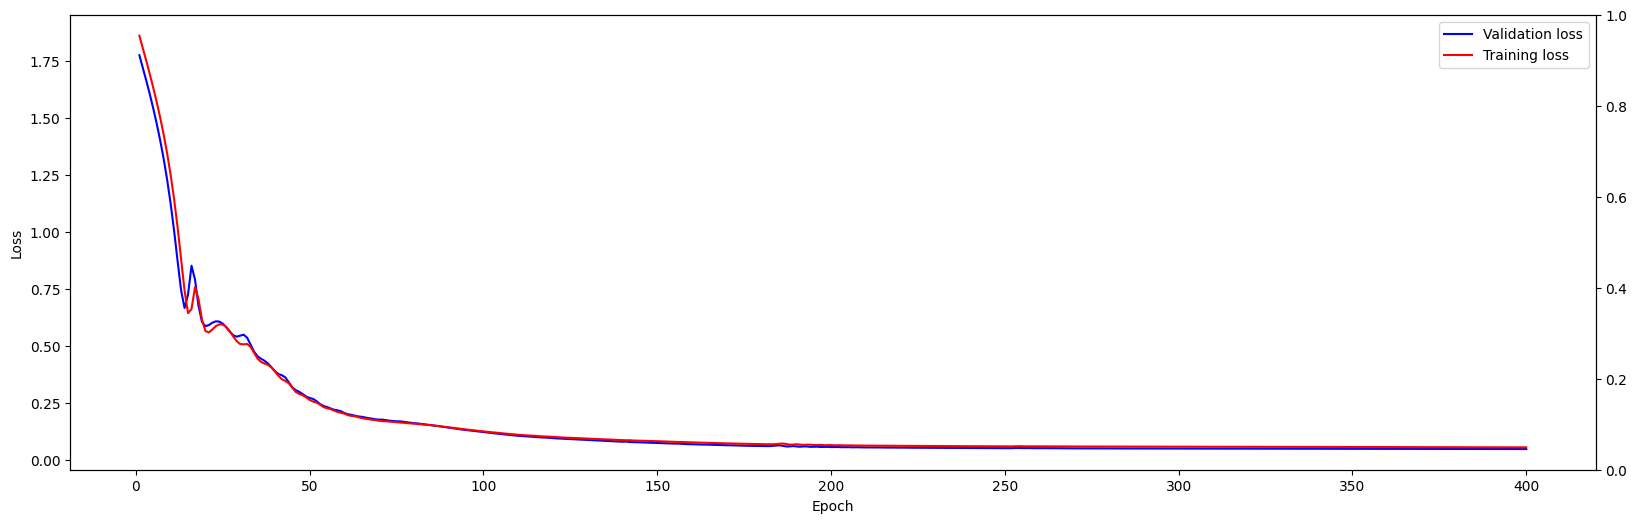

In [17]:

epoch = np.linspace(1, num_epochs, num_epochs) 
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(epoch, valid_loss, 'b-')
ax1.plot(epoch, train_loss, 'r-')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Validation loss', 'Training loss'], ncol=1, frameon=True)  
fig.set_size_inches(50/2.54, 15/2.54) 

Test the model 

torch.Size([969, 2])
torch.Size([969, 2])


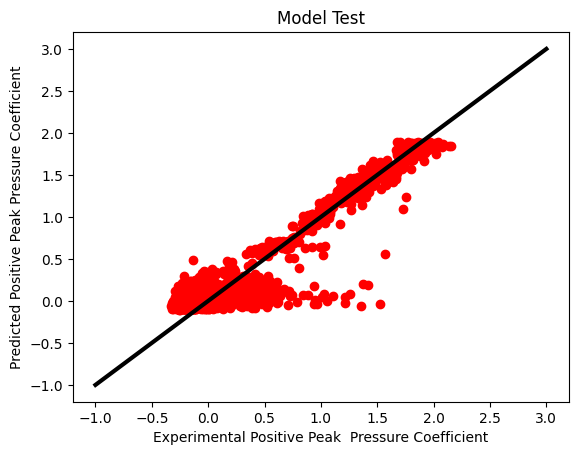

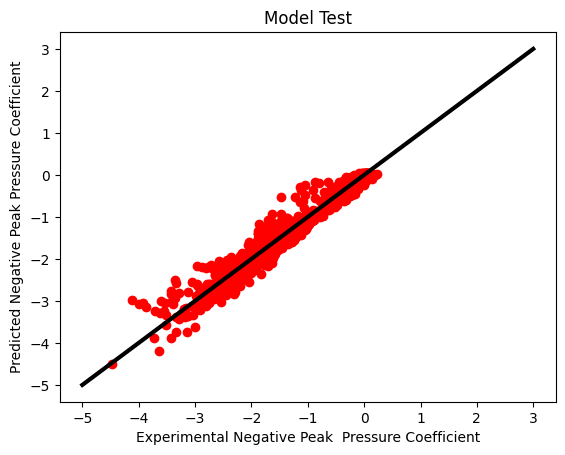

0.4973747680356324
5.854562218870839
49.73747680356324
585.456221887084


In [18]:



pred_peak = mlp_model(test_features_tor) 
pred_peak_numpy = pred_peak.detach().numpy()
test_peak_numpy  = test_peak_tor.detach().numpy()

#Plot experimental values on the x axis and pred_peak on the y axis for both positive and negative peaks 

#Do the same but for a left Side tap 
#Plot Sample 
print(test_peak_tor.shape)
print(pred_peak.shape)


plt.plot(test_peak_numpy[:,0], pred_peak_numpy[:,0], 'or')
plt.plot([-1,3], [-1, 3], '-k', linewidth=3)
plt.ylabel('Predicted Positive Peak Pressure Coefficient')
plt.xlabel('Experimental Positive Peak  Pressure Coefficient')
plt.title('Model Test')             
plt.show()

plt.plot(test_peak_numpy[:,1], pred_peak_numpy[:,1], 'or')
plt.plot([-5,3], [-5, 3], '-k', linewidth=3)
plt.ylabel('Predicted Negative Peak Pressure Coefficient')
plt.xlabel('Experimental Negative Peak  Pressure Coefficient')
plt.title('Model Test')             
plt.show()

#calculate the differnece between exp and pred values for max and min peaks 
difference_max = test_peak_numpy[:,0] - pred_peak_numpy[:,0]
difference_min = test_peak_numpy[:,1] - pred_peak_numpy[:,1]

#divide the difference by the exp value
error_max = (difference_max/test_peak_numpy[:,0])
error_min = (difference_min/test_peak_numpy[:,1])

#find the sum of the errors (max and min individually)
sum_max = 0
sum_min = 0
n_test = 969


for i in range(n_test):
    sum_max = sum_max+error_max[i]
    sum_min = sum_min+error_min[i]


#find the avg error by dividing by the number of points tested
avg_error_max = sum_max/n_test
avg_error_min = sum_min/n_test

#multiple by 100 to get this as a percent 
avg_percent_error_max = avg_error_max*100
avg_percent_error_min = avg_error_min*100

print(avg_error_max)
print(avg_error_min)

print(avg_percent_error_max)
print(avg_percent_error_min)